<a href="https://colab.research.google.com/github/Shereen74/graduation_project/blob/main/Predictions_ProphetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/GP

/content/drive/MyDrive/GP


In [2]:
!pwd

/content/drive/MyDrive/GP


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

Note to self: These files are without feature scaling!

In [5]:
train_daily_x = pd.read_csv('./train_daily_x.csv', keep_default_na=False, index_col=None)
train_daily_y = pd.read_csv('./train_daily_y.csv', keep_default_na=False, index_col=None)
test_daily_x = pd.read_csv('./test_daily_x.csv', keep_default_na=False, index_col=None)
test_daily_y = pd.read_csv('./test_daily_y.csv', keep_default_na=False, index_col=None)

# Simple preprocessing

In [6]:
# Converting month, day, hour back to timestamp 

train_daily_x['month'] = pd.to_numeric(train_daily_x['month'], errors='coerce')
train_daily_x['day'] = pd.to_numeric(train_daily_x['day'], errors='coerce')
train_daily_x['hour'] = pd.to_numeric(train_daily_x['hour'], errors='coerce')

train_daily_x['timestamp'] = pd.to_datetime('2016-' + train_daily_x['month'].astype(str) + '-' + train_daily_x['day'].astype(str) + ' ' + train_daily_x['hour'].astype(str) + ':00:00')
# Print any rows with invalid dates
print(train_daily_x[train_daily_x['timestamp'].isnull()])

# Remove rows with invalid dates
train_daily_x = train_daily_x.dropna(subset=['timestamp'])

# Reset the index if needed
train_daily_x = train_daily_x.reset_index(drop=True)

Empty DataFrame
Columns: [site_id, day, month, building_id, meter, square_feet, air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_speed, IsHoliday, hour, weekend, primary_use_Education, primary_use_Entertainment/public assembly, primary_use_Food sales and service, primary_use_Healthcare, primary_use_Lodging/residential, primary_use_Manufacturing/industrial, primary_use_Office, primary_use_Other, primary_use_Parking, primary_use_Public services, primary_use_Religious worship, primary_use_Retail, primary_use_Services, primary_use_Technology/science, primary_use_Utility, primary_use_Warehouse/storage, timestamp]
Index: []

[0 rows x 32 columns]


In [7]:
# Converting month, day, hour back to timestamp 

test_daily_x['month'] = pd.to_numeric(test_daily_x['month'], errors='coerce')
test_daily_x['day'] = pd.to_numeric(test_daily_x['day'], errors='coerce')
test_daily_x['hour'] = pd.to_numeric(test_daily_x['hour'], errors='coerce')

test_daily_x['timestamp'] = pd.to_datetime('2016-' + test_daily_x['month'].astype(str) + '-' + test_daily_x['day'].astype(str) + ' ' + test_daily_x['hour'].astype(str) + ':00:00')

# Print any rows with invalid dates
print(test_daily_x[test_daily_x['timestamp'].isnull()])

# Remove rows with invalid dates
test_daily_x = test_daily_x.dropna(subset=['timestamp'])

# Reset the index if needed
test_daily_x = test_daily_x.reset_index(drop=True)

Empty DataFrame
Columns: [site_id, day, month, building_id, meter, square_feet, air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_speed, IsHoliday, hour, weekend, primary_use_Education, primary_use_Entertainment/public assembly, primary_use_Food sales and service, primary_use_Healthcare, primary_use_Lodging/residential, primary_use_Manufacturing/industrial, primary_use_Office, primary_use_Other, primary_use_Parking, primary_use_Public services, primary_use_Religious worship, primary_use_Retail, primary_use_Services, primary_use_Technology/science, primary_use_Utility, primary_use_Warehouse/storage, timestamp]
Index: []

[0 rows x 32 columns]


In [8]:
train_daily_x = train_daily_x.drop(['month', 'day', 'hour'], axis=1)
test_daily_x = test_daily_x.drop(['month', 'day', 'hour'], axis=1)

In [9]:
train_daily_x

,site_id,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,...,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,timestamp
0,0,0,0,7432.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,0,2016-01-01 00:00:00
1,0,1,0,2720.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,0,2016-01-01 00:00:00
2,0,2,0,5376.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,0,2016-01-01 00:00:00
3,0,3,0,23685.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,0,2016-01-01 00:00:00
4,0,4,0,116607.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,0,2016-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13346740,15,1444,0,19619.0,22.8,0.363636,17.8,-0.198697,1016.39014,2.1,...,0,0,0,0,0,0,0,0,0,2016-08-31 23:00:00
13346741,15,1445,0,4298.0,22.8,0.363636,17.8,-0.198697,1016.39014,2.1,...,0,0,0,0,0,0,0,0,0,2016-08-31 23:00:00
13346742,15,1446,0,11265.0,22.8,0.363636,17.8,-0.198697,1016.39014,2.1,...,0,0,0,0,0,0,0,0,0,2016-08-31 23:00:00
13346743,15,1447,0,29775.0,22.8,0.363636,17.8,-0.198697,1016.39014,2.1,...,0,0,0,0,0,0,0,0,0,2016-08-31 23:00:00


Adding the target variable to my train data

In [10]:
train_daily_x = train_daily_x.assign(meter_reading_log1p=train_daily_y['meter_reading_log1p'])

In [11]:
train_daily_x

,site_id,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,...,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,timestamp,meter_reading_log1p
0,0,0,0,7432.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000000
1,0,1,0,2720.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000000
2,0,2,0,5376.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000000
3,0,3,0,23685.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000000
4,0,4,0,116607.0,25.0,6.000000,20.0,-0.173913,1019.70000,0.0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13346740,15,1444,0,19619.0,22.8,0.363636,17.8,-0.198697,1016.39014,2.1,...,0,0,0,0,0,0,0,0,2016-08-31 23:00:00,2.630089
13346741,15,1445,0,4298.0,22.8,0.363636,17.8,-0.198697,1016.39014,2.1,...,0,0,0,0,0,0,0,0,2016-08-31 23:00:00,1.266948
13346742,15,1446,0,11265.0,22.8,0.363636,17.8,-0.198697,1016.39014,2.1,...,0,0,0,0,0,0,0,0,2016-08-31 23:00:00,1.341558
13346743,15,1447,0,29775.0,22.8,0.363636,17.8,-0.198697,1016.39014,2.1,...,0,0,0,0,0,0,0,0,2016-08-31 23:00:00,5.402339


Adding my target variable to my test data

In [12]:
test_daily_x = test_daily_x.assign(meter_reading_log1p=test_daily_y['meter_reading_log1p'])

In [13]:
test_daily_x

,site_id,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,...,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,timestamp,meter_reading_log1p
0,0,0,0,7432.0,24.4,8.0,23.3,-1.0,1013.7,2.1,...,0,0,0,0,0,0,0,0,2016-09-01 00:00:00,4.331021
1,0,1,0,2720.0,24.4,8.0,23.3,-1.0,1013.7,2.1,...,0,0,0,0,0,0,0,0,2016-09-01 00:00:00,3.746486
2,0,2,0,5376.0,24.4,8.0,23.3,-1.0,1013.7,2.1,...,0,0,0,0,0,0,0,0,2016-09-01 00:00:00,1.818324
3,0,3,0,23685.0,24.4,8.0,23.3,-1.0,1013.7,2.1,...,0,0,0,0,0,0,0,0,2016-09-01 00:00:00,4.821378
4,0,4,0,116607.0,24.4,8.0,23.3,-1.0,1013.7,2.1,...,0,0,0,0,0,0,0,0,2016-09-01 00:00:00,6.138452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851784,15,1444,0,19619.0,1.7,2.0,-5.6,-1.0,1008.5,8.8,...,0,0,0,0,0,0,0,0,2016-12-31 23:00:00,2.277267
6851785,15,1445,0,4298.0,1.7,2.0,-5.6,-1.0,1008.5,8.8,...,0,0,0,0,0,0,0,0,2016-12-31 23:00:00,1.762159
6851786,15,1446,0,11265.0,1.7,2.0,-5.6,-1.0,1008.5,8.8,...,0,0,0,0,0,0,0,0,2016-12-31 23:00:00,0.000000
6851787,15,1447,0,29775.0,1.7,2.0,-5.6,-1.0,1008.5,8.8,...,0,0,0,0,0,0,0,0,2016-12-31 23:00:00,5.078761


Extracting data with building id = 0, site id = 0, meter type (electricity),
 applied on train and test

In [14]:
train_id0 = train_daily_x[((train_daily_x.site_id==0) & (train_daily_x.meter==0) & (train_daily_x.building_id == 0))]

In [15]:
train_id0.reset_index(drop=True, inplace=True)

In [16]:
train_id0

,site_id,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,...,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,timestamp,meter_reading_log1p
0,0,0,0,7432.0,25.0,6.000000,20.0,-0.173913,1019.7,0.0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000000
1,0,0,0,7432.0,24.4,4.285714,21.1,-1.000000,1020.2,1.5,...,0,0,0,0,0,0,0,0,2016-01-01 01:00:00,0.000000
2,0,0,0,7432.0,22.8,2.000000,21.1,0.000000,1020.2,0.0,...,0,0,0,0,0,0,0,0,2016-01-01 02:00:00,0.000000
3,0,0,0,7432.0,21.1,2.000000,20.6,0.000000,1020.1,0.0,...,0,0,0,0,0,0,0,0,2016-01-01 03:00:00,0.000000
4,0,0,0,7432.0,20.0,2.000000,20.0,-1.000000,1020.0,2.6,...,0,0,0,0,0,0,0,0,2016-01-01 04:00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,0,0,0,7432.0,29.4,7.500000,23.3,0.000000,1012.7,4.6,...,0,0,0,0,0,0,0,0,2016-08-31 19:00:00,4.254479
5852,0,0,0,7432.0,28.9,7.500000,23.9,0.000000,1012.1,5.1,...,0,0,0,0,0,0,0,0,2016-08-31 20:00:00,4.251637
5853,0,0,0,7432.0,27.2,7.500000,23.3,-1.000000,1012.2,12.9,...,0,0,0,0,0,0,0,0,2016-08-31 21:00:00,4.279726
5854,0,0,0,7432.0,23.3,7.500000,21.7,51.000000,1012.7,3.1,...,0,0,0,0,0,0,0,0,2016-08-31 22:00:00,4.271384


In [17]:
test_id0 = test_daily_x[((test_daily_x.site_id==0) & (test_daily_x.meter==0) & (test_daily_x.building_id == 0))]

In [18]:
test_id0.reset_index(drop=True, inplace=True)
test_id0

,site_id,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,...,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,timestamp,meter_reading_log1p
0,0,0,0,7432.0,24.4,8.000000,23.3,-1.0,1013.7000,2.1,...,0,0,0,0,0,0,0,0,2016-09-01 00:00:00,4.331021
1,0,0,0,7432.0,24.4,8.000000,23.3,10.0,1014.3000,0.0,...,0,0,0,0,0,0,0,0,2016-09-01 01:00:00,4.325745
2,0,0,0,7432.0,23.9,8.000000,22.8,50.0,1013.0696,6.2,...,0,0,0,0,0,0,0,0,2016-09-01 02:00:00,4.331021
3,0,0,0,7432.0,23.9,8.000000,22.8,46.0,1015.0000,2.6,...,0,0,0,0,0,0,0,0,2016-09-01 03:00:00,4.331021
4,0,0,0,7432.0,23.3,8.000000,22.2,10.0,1015.7000,3.6,...,0,0,0,0,0,0,0,0,2016-09-01 04:00:00,4.341492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,0,0,0,7432.0,22.8,2.857143,10.0,0.0,1021.7000,5.7,...,0,0,0,0,0,0,0,0,2016-12-31 19:00:00,4.234396
2924,0,0,0,7432.0,23.3,2.857143,8.9,0.0,1021.0000,4.1,...,0,0,0,0,0,0,0,0,2016-12-31 20:00:00,4.032755
2925,0,0,0,7432.0,23.3,2.857143,10.0,0.0,1021.1000,4.1,...,0,0,0,0,0,0,0,0,2016-12-31 21:00:00,3.928185
2926,0,0,0,7432.0,22.8,2.857143,10.0,0.0,1021.1000,3.1,...,0,0,0,0,0,0,0,0,2016-12-31 22:00:00,3.928185


Copying timestamp and meter reading to a new dataframe for prophet

In [19]:
train_data = train_id0[['timestamp', 'meter_reading_log1p']].copy()
train_data.columns = ['ds', 'y']

In [20]:
test_data = test_id0[['timestamp', 'meter_reading_log1p']].copy()
test_data.columns = ['ds', 'y']

In [21]:
test_data

,ds,y
0,2016-09-01 00:00:00,4.331021
1,2016-09-01 01:00:00,4.325745
2,2016-09-01 02:00:00,4.331021
3,2016-09-01 03:00:00,4.331021
4,2016-09-01 04:00:00,4.341492
...,...,...
2923,2016-12-31 19:00:00,4.234396
2924,2016-12-31 20:00:00,4.032755
2925,2016-12-31 21:00:00,3.928185
2926,2016-12-31 22:00:00,3.928185


In [22]:
# Making sure that the train data has unique values of timestamp
num_unique_timestamps1 = train_id0['timestamp'].nunique()
print(num_unique_timestamps1)

num_unique_timestamps2 = test_id0['timestamp'].nunique()
print(num_unique_timestamps2)

5856
2928


# Prophet Model 

In [23]:
%%time
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10beue59/6ald1to6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10beue59/71d0cb9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91741', 'data', 'file=/tmp/tmp10beue59/6ald1to6.json', 'init=/tmp/tmp10beue59/71d0cb9x.json', 'output', 'file=/tmp/tmp10beue59/prophet_modelgj4ftya4/prophet_model-20230606005124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 386 ms, sys: 27 ms, total: 413 ms
Wall time: 2.97 s


In [24]:
forecast_energy = model.predict(test_data)
forecast_energy[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]

,ds,yhat_lower,yhat,yhat_upper
0,2016-09-01 00:00:00,3.938401,4.394975,4.851117
1,2016-09-01 01:00:00,3.951620,4.396414,4.787349
2,2016-09-01 02:00:00,3.965771,4.394774,4.813626
3,2016-09-01 03:00:00,3.952971,4.389486,4.801800
4,2016-09-01 04:00:00,3.954171,4.383855,4.835897
...,...,...,...,...
2923,2016-12-31 19:00:00,-6.208156,4.448909,14.358318
2924,2016-12-31 20:00:00,-6.275306,4.448117,14.524616
2925,2016-12-31 21:00:00,-6.416404,4.443053,14.498162
2926,2016-12-31 22:00:00,-6.249792,4.437047,14.609560


# Model Evaluation 

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
# Assuming you have actual values in 'y_true' and predicted values in 'y_pred'
mse = mean_squared_error(test_id0['meter_reading_log1p'], forecast_energy['yhat'])
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.14023773202865572
Root Mean Squared Error (RMSE): 0.37448328671471537


In [27]:
test_results = {'Actual': test_id0['meter_reading_log1p'], 'Predicted':forecast_energy['yhat']}
test_results_df = pd.DataFrame(test_results)
test_results_df

,Actual,Predicted
0,4.331021,4.394975
1,4.325745,4.396414
2,4.331021,4.394774
3,4.331021,4.389486
4,4.341492,4.383855
...,...,...
2923,4.234396,4.448909
2924,4.032755,4.448117
2925,3.928185,4.443053
2926,3.928185,4.437047


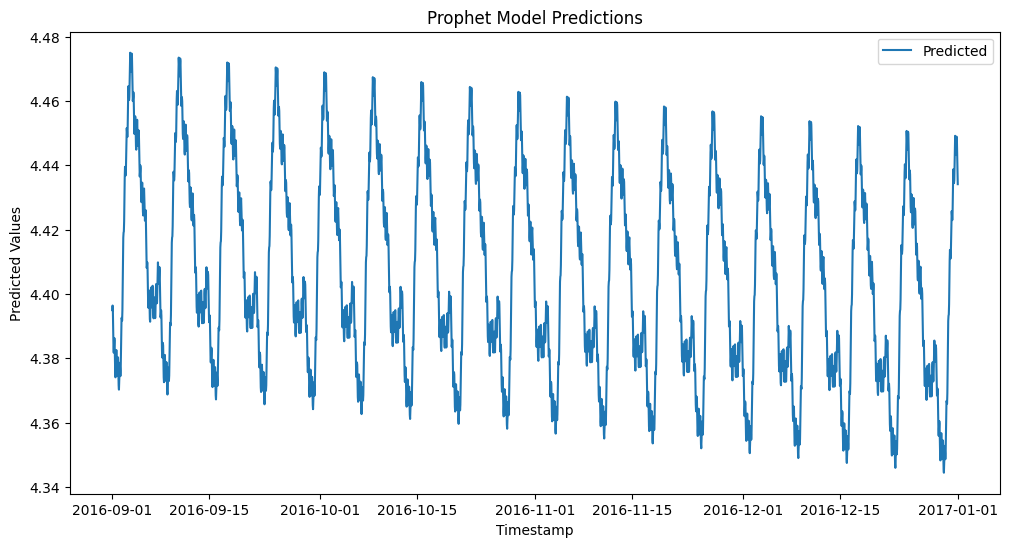

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_energy['ds'], forecast_energy['yhat'], label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Predicted Values')
plt.title('Prophet Model Predictions')
plt.legend()
plt.show()

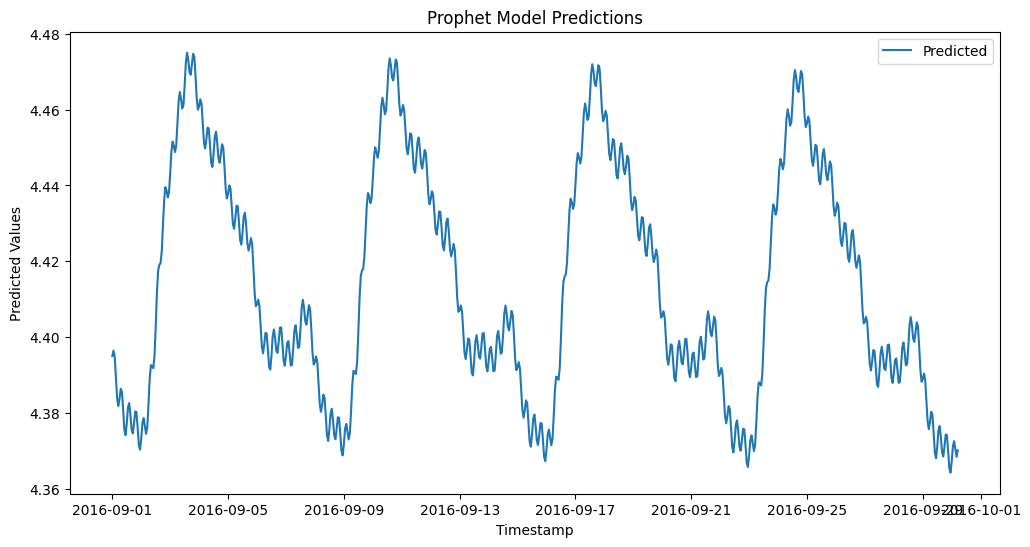

In [29]:
end_date = '2016-09-30 05:00:00'


# Subset the arrays based on the desired end date
mask = forecast_energy['ds'] <= end_date
ds_subset = forecast_energy['ds'][mask]
predict_subset = forecast_energy['yhat'][mask]

plt.figure(figsize=(12, 6))
plt.plot(ds_subset, predict_subset, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Predicted Values')
plt.title('Prophet Model Predictions')
plt.legend()
plt.show()

# Prophet with added Holiday feature

In [30]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [31]:
cal = calendar()
holidays = cal.holidays(start = train_data['ds'].min(), end = train_data['ds'].max(), return_name=True)
holiday_df = pd.DataFrame(data = holidays, columns=['holiday'])
holiday_df = holiday_df.reset_index().rename(columns={'index':'ds'})
holiday_df

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-01-18,"Birthday of Martin Luther King, Jr."
2,2016-02-15,Washington’s Birthday
3,2016-05-30,Memorial Day
4,2016-07-04,Independence Day


In [32]:
model_with_holidays = Prophet(holidays = holiday_df)
model_with_holidays.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10beue59/uhy8z0mv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10beue59/eqq8ov3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26925', 'data', 'file=/tmp/tmp10beue59/uhy8z0mv.json', 'init=/tmp/tmp10beue59/eqq8ov3p.json', 'output', 'file=/tmp/tmp10beue59/prophet_modeloa1nvycf/prophet_model-20230606005128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
forecast_energy_holidays = model_with_holidays.predict(df=test_data)
forecast_energy_holidays[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]

,ds,yhat_lower,yhat,yhat_upper
0,2016-09-01 00:00:00,3.961801,4.397704,4.847275
1,2016-09-01 01:00:00,3.984204,4.399125,4.819987
2,2016-09-01 02:00:00,3.966471,4.397429,4.821382
3,2016-09-01 03:00:00,3.985445,4.392048,4.829650
4,2016-09-01 04:00:00,3.975877,4.386294,4.838230
...,...,...,...,...
2923,2016-12-31 19:00:00,-5.825345,4.463721,14.539240
2924,2016-12-31 20:00:00,-5.933349,4.462761,14.532051
2925,2016-12-31 21:00:00,-5.846187,4.457565,14.530623
2926,2016-12-31 22:00:00,-6.105455,4.451475,14.600661


# Model with holidays evaluation

In [34]:
# Assuming you have actual values in 'y_true' and predicted values in 'y_pred'
mse1 = mean_squared_error(test_id0['meter_reading_log1p'], forecast_energy_holidays['yhat'])
rmse1 = np.sqrt(mse1)

print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)

Mean Squared Error (MSE): 0.14803736869221093
Root Mean Squared Error (RMSE): 0.3847562458131264


In [35]:
test_results1 = {'Actual': test_id0['meter_reading_log1p'], 'Predicted':forecast_energy_holidays['yhat']}
test_results1_df = pd.DataFrame(test_results1)
test_results1_df

,Actual,Predicted
0,4.331021,4.397704
1,4.325745,4.399125
2,4.331021,4.397429
3,4.331021,4.392048
4,4.341492,4.386294
...,...,...
2923,4.234396,4.463721
2924,4.032755,4.462761
2925,3.928185,4.457565
2926,3.928185,4.451475


# Visualize Prophet Components

## Trends, Holidays, Weekly, Daily

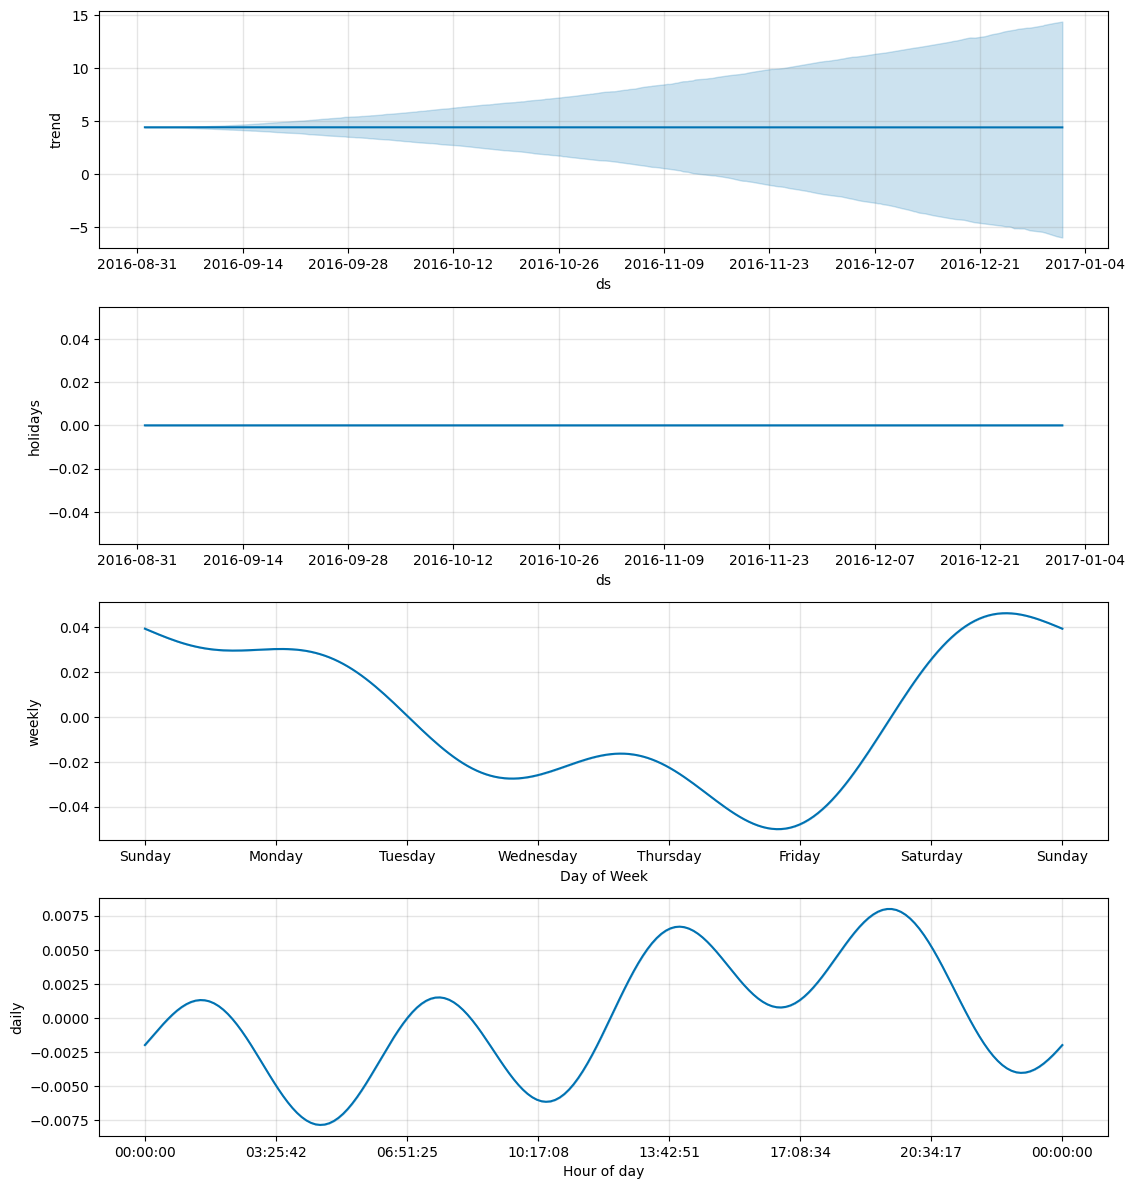

In [48]:
fig = model_with_holidays.plot_components(
    forecast_energy_holidays)
fig.set_figwidth(12)
plt.show()

## Predictions vs Actual

In [ ]:
test_id0.set_index('timestamp', inplace=True)

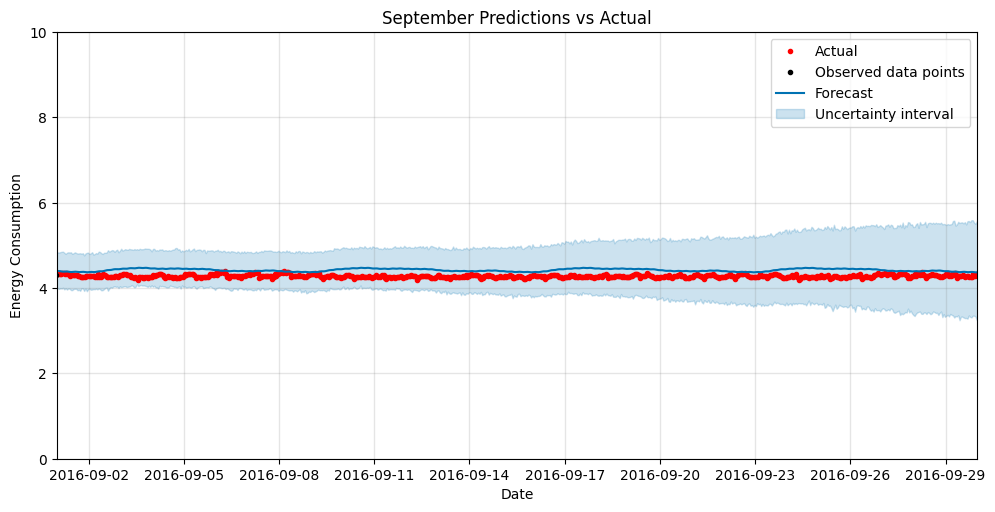

In [70]:
fig4, ax = plt.subplots(figsize=(10, 5))
ax.plot(test_id0.index, test_id0['meter_reading_log1p'], 'r.', label='Actual')
model_with_holidays.plot(forecast_energy_holidays, ax=ax)
ax.set_xlim(pd.to_datetime('2016-09-01'), pd.to_datetime('2016-09-30'))
ax.set_ylim(0, 10)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('September Predictions vs Actual')
plt.legend()
plt.show()

# More features

In [82]:
# Create regressors DataFrame with timestamp and regressor columns
regressors = pd.DataFrame()
regressors['ds'] = train_id0['timestamp']
regressors['air_temperature_x'] = train_id0['air_temperature']
regressors['cloud_coverage_x'] = train_id0['cloud_coverage']
regressors['dew_temperature_x'] = train_id0['dew_temperature']
regressors['precip_depth_1_hr_x'] = train_id0['precip_depth_1_hr']
regressors['sea_level_pressure_x'] = train_id0['sea_level_pressure']
regressors['wind_speed_x'] = train_id0['wind_speed']


# Convert 'ds' column to datetime type
regressors['ds'] = pd.to_datetime(regressors['ds'])

# Initialize Prophet model_with_features
model_with_features = Prophet(holidays = holiday_df)

# Add regressors to the model_with_features
model_with_features.add_regressor('air_temperature_x')
model_with_features.add_regressor('cloud_coverage_x')
model_with_features.add_regressor('dew_temperature_x')
model_with_features.add_regressor('precip_depth_1_hr_x')
model_with_features.add_regressor('sea_level_pressure_x')
model_with_features.add_regressor('wind_speed_x')

# Add these features to train_data
train_data = train_data.merge(train_id0[['timestamp', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed']],
                              left_on='ds', right_on='timestamp', how='left')

train_data.drop('timestamp', axis=1, inplace=True)

# Fit the model with the additional regressors
model_with_features.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10beue59/brikoj5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10beue59/7x07lnkm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92192', 'data', 'file=/tmp/tmp10beue59/brikoj5z.json', 'init=/tmp/tmp10beue59/7x07lnkm.json', 'output', 'file=/tmp/tmp10beue59/prophet_modeluav458bh/prophet_model-20230606020635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:06:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [95]:
test_data = test_data.merge(test_id0[['air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed']],
                              left_on='ds', right_index=True, how='left')

# test_data.drop('timestamp', axis=1, inplace=True)

In [96]:
test_data

,ds,y,air_temperature_x,cloud_coverage_x,dew_temperature_x,precip_depth_1_hr_x,sea_level_pressure_x,wind_speed_x,air_temperature_y,cloud_coverage_y,dew_temperature_y,precip_depth_1_hr_y,sea_level_pressure_y,wind_speed_y
0,2016-09-01 00:00:00,4.331021,24.4,8.000000,23.3,-1.0,1013.7000,2.1,24.4,8.000000,23.3,-1.0,1013.7000,2.1
1,2016-09-01 01:00:00,4.325745,24.4,8.000000,23.3,10.0,1014.3000,0.0,24.4,8.000000,23.3,10.0,1014.3000,0.0
2,2016-09-01 02:00:00,4.331021,23.9,8.000000,22.8,50.0,1013.0696,6.2,23.9,8.000000,22.8,50.0,1013.0696,6.2
3,2016-09-01 03:00:00,4.331021,23.9,8.000000,22.8,46.0,1015.0000,2.6,23.9,8.000000,22.8,46.0,1015.0000,2.6
4,2016-09-01 04:00:00,4.341492,23.3,8.000000,22.2,10.0,1015.7000,3.6,23.3,8.000000,22.2,10.0,1015.7000,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2016-12-31 19:00:00,4.234396,22.8,2.857143,10.0,0.0,1021.7000,5.7,22.8,2.857143,10.0,0.0,1021.7000,5.7
2924,2016-12-31 20:00:00,4.032755,23.3,2.857143,8.9,0.0,1021.0000,4.1,23.3,2.857143,8.9,0.0,1021.0000,4.1
2925,2016-12-31 21:00:00,3.928185,23.3,2.857143,10.0,0.0,1021.1000,4.1,23.3,2.857143,10.0,0.0,1021.1000,4.1
2926,2016-12-31 22:00:00,3.928185,22.8,2.857143,10.0,0.0,1021.1000,3.1,22.8,2.857143,10.0,0.0,1021.1000,3.1


In [97]:
forecast_energy_features = model_with_features.predict(df=test_data)
forecast_energy_features[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]

,ds,yhat_lower,yhat,yhat_upper
0,2016-09-01 00:00:00,3.906497,4.320520,4.766474
1,2016-09-01 01:00:00,3.884293,4.330991,4.765560
2,2016-09-01 02:00:00,3.853733,4.324087,4.722601
3,2016-09-01 03:00:00,3.894933,4.319766,4.753756
4,2016-09-01 04:00:00,3.906283,4.314853,4.727888
...,...,...,...,...
2923,2016-12-31 19:00:00,-5.320554,4.471404,14.033739
2924,2016-12-31 20:00:00,-5.338599,4.480389,14.153688
2925,2016-12-31 21:00:00,-5.311187,4.466095,14.330532
2926,2016-12-31 22:00:00,-5.299193,4.469078,14.285570


In [98]:
# Assuming you have actual values in 'y_true' and predicted values in 'y_pred'
mse2 = mean_squared_error(test_id0['meter_reading_log1p'], forecast_energy_features['yhat'])
rmse2 = np.sqrt(mse2)

print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)

Mean Squared Error (MSE): 0.14611682218692157
Root Mean Squared Error (RMSE): 0.38225230174182284
